***サポートベクターマシン　実装演習***

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
import seaborn as sns

In [12]:
iris = load_iris()

X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target
X["target"] = iris.target
# sns.pairplot(X,hue = "target")

X_train = X.iloc[:,[1,3]].values

t = np.where(y == 0, 1.0, -1.0)
print(t)

n_samples = len(X_train)

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1.]


In [13]:
K = X_train.dot(X_train.T)
print(K)

eta1 = 0.001
eta2 = 0.0001
n_iter = 100000

H = np.outer(t, t) * K

a = np.ones(n_samples)
print(a)

[[12.29 10.54 11.24 ... 10.9  12.36 10.86]
 [10.54  9.04  9.64 ...  9.4  10.66  9.36]
 [11.24  9.64 10.28 ... 10.   11.34  9.96]
 ...
 [10.9   9.4  10.   ... 13.   14.8  12.6 ]
 [12.36 10.66 11.34 ... 14.8  16.85 14.34]
 [10.86  9.36  9.96 ... 12.6  14.34 12.24]]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [14]:
for _ in range(n_iter):
    grad = 1 - H.dot(a)
    a += eta1 * grad
    a -= eta2 * a.dot(t) * t
    a = np.where(a > 0, a, 0)
    
index = a > 1e-6
support_vectors = X_train[index]
support_vector_t = t[index]
support_vector_a = a[index]


term2 = K[index][:,index].dot(support_vector_a * support_vector_t)
b = (support_vector_t - term2).mean()

xx0, xx1 = np.meshgrid(np.linspace(0, 5, 100), np.linspace(0, 5, 100))
xx = np.array([xx0, xx1]).reshape(2, -1).T

X_test = xx
y_project = np.ones(len(X_test)) * b
for i in range(len(X_test)):
    for a, sv_t, sv in zip(support_vector_a, support_vector_t, support_vectors):
        y_project[i] += a * sv_t * sv.dot(X_test[i])
y_pred = np.sign(y_project)

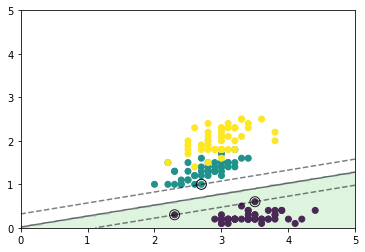

In [16]:
# 訓練データを可視化
plt.scatter(X_train[:, 0], X_train[:, 1], c=y)
# サポートベクトルを可視化
plt.scatter(support_vectors[:, 0], support_vectors[:, 1],
                    s=100, facecolors='none', edgecolors='k')
#領域を可視化
plt.contourf(xx0, xx1, y_pred.reshape(100, 100), alpha=0.2, levels=np.linspace(0, 1, 3))
#マージンと決定境界を可視化
plt.contour(xx0, xx1, y_project.reshape(100, 100), colors='k',
                      levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])




    
    


irisデータセットをSVMで分離することを試みた。  
学習率とイテレーション回数を適切に設定しないと、サポートベクターが適切に決定されず結果的には発散してしまった。  
今回は、学習率を低くしてかなりの回数学習させることにより収束させたが、それでも、理論通りのサポートベクター（境界から最も小さい要素）を取得できているわけではない。  
このデータよりも重いデータを学習させるような場合には、学習率の更新のさせ方に工夫が必要だろう。

